# **Intro Machine Learning**

**Etude des données**

**Sklearn**

In [ ]:
# Importations 
import matplotlib.pyplot as plt
from sklearn import datasets
%matplotlib inline
# les données
digits = datasets.load_digits()
# Contenu et mode d'obtention
print(digits)

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]]), 'target': array([0, 1, 2, ..., 8, 9, 8]), 'target_names': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), 'images': array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
        [ 0.,  0., 13., ..., 15.,  5.,  0.],
        [ 0.,  3., 15., ..., 11.,  8.,  0.],
        ...,
        [ 0.,  4., 11., ..., 12.,  7.,  0.],
        [ 0.,  2., 14., ..., 12.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.]],

       [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
        [ 0.,  0.,  0., ...,  9.,  0.,  0.],
        [ 0.,  0.,  3., ...,  6.,  0.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.]],

       [[ 0.,  0.,  0., ..., 12.,  0

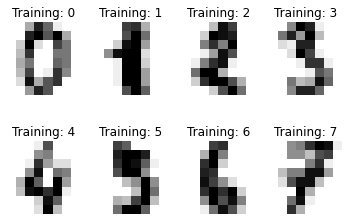

In [ ]:
images_and_labels = list(zip(digits.images, 
   digits.target))
for index, (image, label) in  enumerate(images_and_labels[:8]):
     plt.subplot(2, 4, index + 1)
     plt.axis('off')
     plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
     plt.title('Training: %i' % label)

In [ ]:
# variables prédictives et cible
X=digits.data
y=digits.target
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=11)

**Régression linéaire**

# Implémentation d'un régression linéaire


In [ ]:
#Importation des libraires
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

prices = pd.read_csv('../content/sample_data/price_availability.csv', sep=';')
prices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4748696 entries, 0 to 4748695
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   listing_id      int64 
 1   day             object
 2   created         object
 3   available       bool  
 4   local_currency  object
 5   local_price     int64 
 6   min_nights      int64 
dtypes: bool(1), int64(3), object(3)
memory usage: 221.9+ MB


In [ ]:
listingFinal = pd.read_csv('../content/sample_data/listings_final.csv', sep=';')
listingFinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                1000 non-null   int64  
 1   listing_id                1000 non-null   int64  
 2   name                      1000 non-null   object 
 3   type                      1000 non-null   object 
 4   city                      1000 non-null   object 
 5   neighborhood              935 non-null    object 
 6   latitude                  1000 non-null   float64
 7   longitude                 1000 non-null   float64
 8   person_capacity           1000 non-null   int64  
 9   beds                      1000 non-null   int64  
 10  bedrooms                  1000 non-null   int64  
 11  bathrooms                 1000 non-null   float64
 12  is_rebookable             1000 non-null   bool   
 13  is_new_listing            1000 non-null   bool   
 14  is_fully_

On peut observer que nous somme dans le cas d'un aprentissage superviser car les données son labélisés. De plus on peut observer une jointure sur "listing_id".

On fat cherche note id de le petit et aller chercher les valeurs correspondantes dans le gros, puis calculer la moyenne et rajouter une colonne 'prix moyen" dans le petit avec la valeur calculer.  

In [ ]:
df1 = prices[prices['local_price'].notna()]
df1

listing_id         day  ... local_price  min_nights
0           9810829  2018-12-08  ...         160           1
1           9810829  2018-12-08  ...         160           1
2          20897010  2018-12-09  ...         172           2
3          20897010  2018-12-09  ...         172           2
4          20897010  2018-12-09  ...         172           2
...             ...         ...  ...         ...         ...
4748691    23608395  2018-09-06  ...          24           1
4748692    23608395  2018-09-06  ...          24           1
4748693     1447132  2018-12-27  ...         125           3
4748694     1447132  2018-12-27  ...         125           3
4748695     1447132  2018-12-27  ...         125           3

[4748696 rows x 7 columns]

**Formation propre des données**

In [ ]:
#Ajout d'un tableau associatif sur regrouper par champ listing id => [historique de prix]
g = df1.groupby('listing_id');

#Ajout d'une nouvelle colonne 
listingFinal['price_avg']=0

# on fait un boucle sur les lignes du DataFrame qui contient toutes les infos (i = index, x = data)
for (i,x) in listingFinal.iterrows():

#on vérifie que le listing_id possède bien des historiques de prix en regardant si la valeur de listing_id est bien une clé du tableau d'historique g
  if i in listingFinal.index and x.listing_id in g.groups.keys(): 
    # on ajoute pour la ligne i (qui correspond à la ligne) et pour la colonne price_avg la moyenne de tous les historiques de prix
    listingFinal.loc[i,'price_avg'] =g.get_group(x.listing_id).local_price.mean()

listingFinal


Unnamed: 0  listing_id  ... pricing_monthly_factor   price_avg
0             0    28581061  ...                   1.00   45.948454
1             1      661961  ...                   0.69   44.473684
2             2     1261705  ...                   1.00   49.000000
3             3     1318834  ...                   0.48  165.000000
4             4     1677091  ...                   0.90   69.774436
..          ...         ...  ...                    ...         ...
995         995    28335197  ...                   1.00   38.507732
996         996    28583013  ...                   1.00  147.752551
997         997    28628316  ...                   1.00  152.860825
998         998    28792796  ...                   1.00   49.184211
999         999    28682896  ...                   1.00   39.503937

[1000 rows x 20 columns]

**On définit nos variables**

In [ ]:
#définir 2 variables de travail
#X := les features à utiliser 
#Y := la target (prix)
#Alpha = 0.3 
#split -> séparation du jeux de donnée en partie train (pour entrainer notre algo) et en une partie test pour vérifier nos résultats
#4 jeux de donnée , un élément sans prix 

# Choix des caractéristique a forte correlation avec le prix moyenne de l'appartement
X = listingFinal[['person_capacity','beds','bedrooms','bathrooms']] #Caractéristique choisit p = 4
#X = listingFinal #lister toute les colonnes de type int pour une droite de régrésion multiple 
y = listingFinal.price_avg #Objectif a calculer 
Y

0       45.948454
1       44.473684
2       49.000000
3      165.000000
4       69.774436
          ...    
995     38.507732
996    147.752551
997    152.860825
998     49.184211
999     39.503937
Name: price_avg, Length: 1000, dtype: float64

**On split nos résultat en deux partie train et test , 70 % de l'echantillion -> train , 30 % ->test**

In [ ]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)
 

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(700, 4)
(700,)
(300, 4)
(300,)


**On vérifie la présence de valeur null ou nan qui sont incalculable**

In [ ]:
x = float("nan") 
#X_train.isna().any()
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 541 to 102
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   person_capacity  700 non-null    int64  
 1   beds             700 non-null    int64  
 2   bedrooms         700 non-null    int64  
 3   bathrooms        700 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 27.3 KB


**On créé notre fonction de de régréssion linaire**

Et on lui renseignne X_train et y_train pour que l'algoryhtme s'entraine a retrouver la valeur dans y_train a partir des cartactéristique de X_train

In [ ]:
F = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False).fit(X_train,y_train) 

**Coeficient directeur** f(x) = ax + b ou a est le coeficient directeur
On peux observer que le nombre de lit fait baisser les prix, on pourais donc obtenir en théorie un prix négative. 

Cependant on peux observer que la droite est croissante car les autres son positive et plus grande. En moyenne on a tendance a augmenter le prix de 90 euros par salle de bain , de 25 euros par nombre de chambre.

On peux aussi observer l'influence négative du nombre de lits sur le prix de l'appartement.

In [ ]:
F.coef_

array([ 43.92326311, -33.39071743,  26.4891331 ,  90.14340271])

**B0 , ordonnée a l'origine quand x vaut 0** donc (un appartement avec un 0 lits, 0 pieces , 0 person_capacity, 0 sale de bain)

In [ ]:
F.intercept_

-49.96187385427697

**Taux de précision de notre algorithme**

In [ ]:
F.score(X,y)

0.38419418456517385

**On prédit le prix pour l'ordonnée a l'origine**

In [ ]:
F.predict(np.array([[0,0,0,0]]))

array([-49.96187385])

**On réalise une prédiction sur le prix de notre echantilion test de 300 appartement et leur caractéristique**

Un fois que notre algorithme dispose de données d'entrainement pour s'entrainer, nous pouvons réalisez une prédition un nouvelle échantilion, l'échantilion test.

In [ ]:
prediction = F.predict(X_test)
prediction

array([ 175.58227955,   27.85590279,  292.21481536,  175.58227955,
        158.14814954,  166.19817211,   94.63733765,   50.71407454,
        131.65901644,  168.68069522,  105.16988333,  121.12647075,
        594.09920281,  208.97299698,  208.97299698,  202.07141265,
         94.63733765,  329.23649414,  131.65901644,  256.52722144,
         94.63733765,  168.68069522,  508.37486132,  427.61556605,
        300.45048456,  121.12647075,  262.45505928,   94.63733765,
         94.63733765,  202.07141265,  316.91086808,  254.04469833,
        131.65901644,  121.12647075,  175.58227955,  418.23145861,
        186.11482523,   94.63733765,  292.21481536,  152.7241078 ,
        593.1364112 ,  213.75239657,  276.25822794,   94.63733765,
        176.73071779,  202.07141265,   94.63733765,  257.67565969,
        175.58227955,  175.58227955,  633.24306633,  202.07141265,
        261.30662104,  158.14814954,   94.63733765,  283.01635455,
        121.12647075,  247.143114  ,  292.21481536,  551.14968

On peux comparé les prédiction de X_test avec les résultat de y_test est avoir une prémiere information sur la le taux d'érreurs de notre prédiction.


In [ ]:
y_test

521    180.000000
737    131.000000
740    297.000000
660    410.000000
411    156.140385
          ...    
468    195.000000
935     99.000000
428     72.645833
7      213.324607
155     79.000000
Name: price_avg, Length: 300, dtype: float64

Avec R2 -> coefficient de détermination -> taux de préscision

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
#afficher l'erreur des moindres carrées sur l'ensemble d'entrainement ainsi que le R2
print("Mean squared error - score moyenne des erreur au carrée : %.2f" % mean_squared_error(y_test, prediction));
#il faut donc trouver les euros qu'on fait en erreur 
print("Variance R2: %.2f" % r2_score(y_test,prediction))

Mean squared error - score moyenne des erreur au carrée : 23353.18
Variance R2: 0.34


**Erreur en euros par nuit**

In [ ]:
error = np.sqrt(23353.18)
print("Erreur en euros par nuit  %.2f" % error)

Erreur en euros par nuit  152.82


# Les CART, les arbres de décisions

**Importation**

On essaye de générer une fonction qui colle le plus possible a notre jeu de donnée sans etre over fitting et under fitting, programme sur-entrainé ou sous-entrainé. Pour vérifier cela on essaye de le confronté a des données aléatoires.

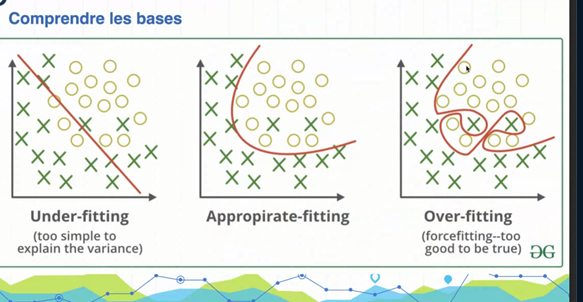

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

In [ ]:
# le random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)#random number 
y = np.sin(X).ravel() #sin number

# le bruit ajouté 
y[::5] += 3 * (0.5 - rng.rand(16))

y #target


array([-1.1493464 ,  0.09131401,  0.09668352,  0.13651039,  0.19403525,
       -0.12383814,  0.26365828,  0.41252216,  0.44546446,  0.47215529,
       -0.26319138,  0.49351799,  0.60530013,  0.63450933,  0.64144608,
        1.09900119,  0.66957978,  0.66968122,  0.73574834,  0.75072053,
        1.4926134 ,  0.8363043 ,  0.8532893 ,  0.87144496,  0.97060533,
       -0.20183403,  0.99131122,  0.99472837,  0.99825213,  0.99999325,
        1.21570343,  0.98769965,  0.98591565,  0.9159044 ,  0.91406986,
       -0.51669013,  0.8775346 ,  0.87063055,  0.86993408,  0.86523559,
        0.37007575,  0.78464608,  0.63168655,  0.53722799,  0.45801971,
        0.08075119,  0.43272116,  0.34115328,  0.26769953,  0.20730318,
        1.34959235, -0.17645185, -0.20918837, -0.24990778, -0.28068224,
       -1.63529379, -0.31247075, -0.31458595, -0.32442911, -0.34965155,
       -0.29371122, -0.46921115, -0.56401144, -0.57215326, -0.57488849,
       -0.95586361, -0.75923066, -0.78043659, -0.85808859, -0.94

In [ ]:
# Fit regression model
regressors = []
depths = [2, 3, 4, 6]
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
#print(X_test) #tableau de 0.01 a 5.00

Y_test = []
for p in depths:
    reg = DecisionTreeRegressor(max_depth=p)  # Création d'un arbre de régression de profondeur p et calcule la place chaque coupure ce qui traduit une courbe
    reg.fit(X, y)  # Processus d'optimisation de l'arbre
    Y_test.append(reg.predict(X_test))  # On prédit sur les données et on ajoute à la liste des valeurs prédites
    regressors.append(reg)
regressors

[DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=2,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best'),
 DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impur

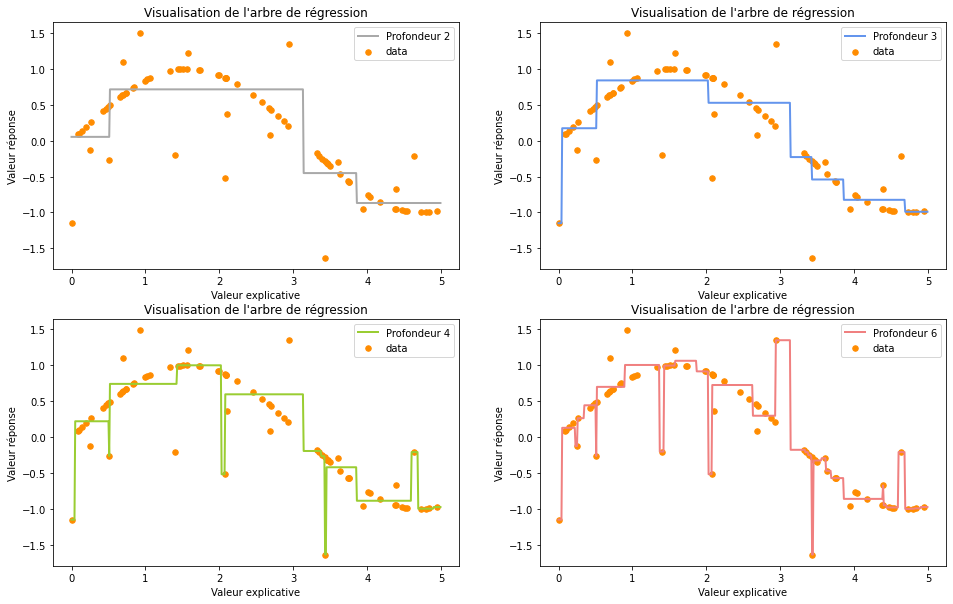

In [ ]:
plt.figure(figsize=(16, 10))
colors = [ "darkgray", "cornflowerblue", "yellowgreen", "lightcoral"]

for i, reg in zip(range(len(regressors)), regressors):
    plt.subplot(220 + i + 1)
    plt.plot(X_test, Y_test[i], color=colors[i], label="Profondeur {0}".format(depths[i]), linewidth=2)
    plt.scatter(X, y, s=30, c="darkorange", label="data")
    plt.xlabel("Valeur explicative")
    plt.ylabel("Valeur réponse")
    plt.title("Visualisation de l'arbre de régression")
    plt.legend()
    
plt.show()

1. under fitting (pas assez précis)

2. colle appeut pres à l'allure de la courbe (appropriate fitting <=> nombre de coupure apropriée)
3. over fitting - car il suit le bruit rajouter avec des valeurs aléatoire
4. over fitting - car il suit trop le bruit rajouter avec des valeurs aléatoire

Donc le cas deux correspond au résultat recherché , donc dans le cas d'une  pronfondeur égale à 3 possédant donc 4 coupure .

Note on peux observer que plus il y a de coupure plus le programme prend en compte le bruit aléatoire et donc il est plus précis , cependant trop ou pas assez de coupure entrain de l'under fitting ( pas assez précis ) ou de l'over fitting (trop précis pour collée a la réalité de la courbe). On cherche a se rapprochez le plus fidélement possible de la courbe sans pour autant comprendre tous ou aucun résultat aléatoire on chercher a obtenir un taux de biais équilibré.

On repére les if de construction de l'arbre grace au étages que l'on peux observer, comme sur le graphique 1 , on voir deux étage quand x inférieur a 3 et deux étages quand x supérieur a 3 (coupure = 3 (profondeur = 2)). 

condition yes/no puis variation de la courbe suivant la réponse.

+ coupure = + de variation de la courbe + de condition donc de noeux dans l'abre.


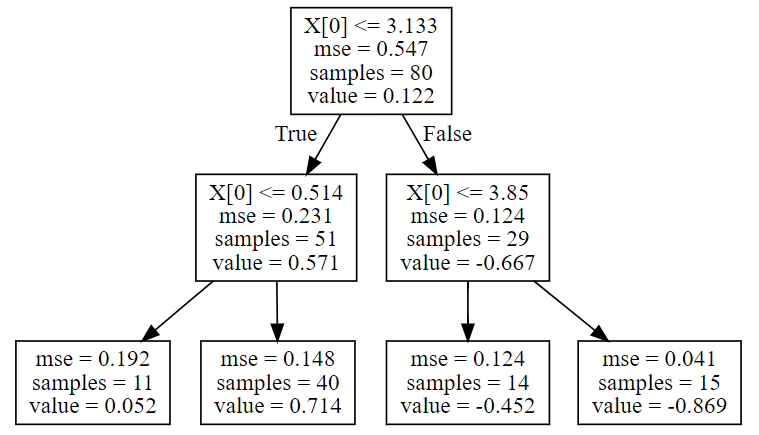

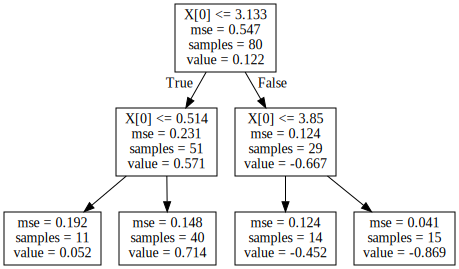

In [ ]:
import graphviz 
dot_data = tree.export_graphviz(regressors[0], out_file=None) 
graph = graphviz.Source(dot_data) 
graph

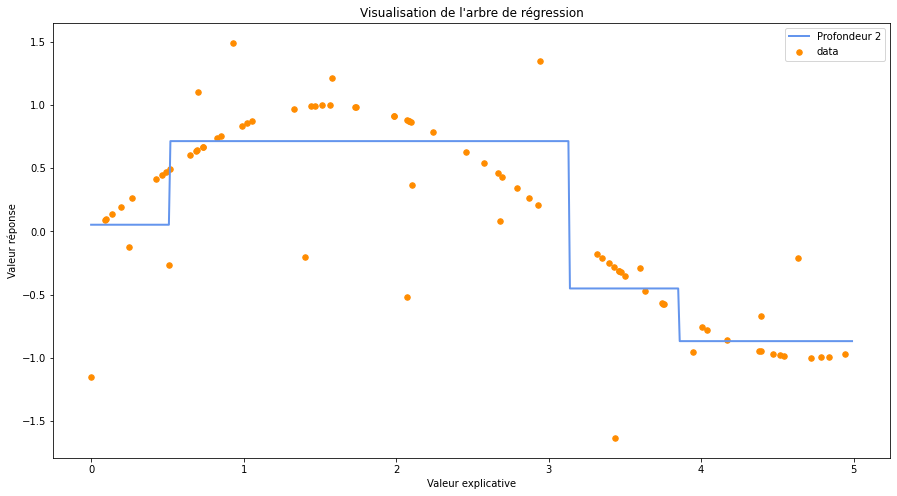

In [ ]:
plt.figure(figsize=(15, 8))
plt.plot(X_test, Y_test[0], color="cornflowerblue", label="Profondeur 2", linewidth=2)
plt.scatter(X, y, s=30, c="darkorange", label="data")
plt.xlabel("Valeur explicative")
plt.ylabel("Valeur réponse")
plt.title("Visualisation de l'arbre de régression")
plt.legend()
    
plt.show()